In [1]:
%matplotlib inline
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

from matplotlib import rcParams
# rcParams['axes.titlepad'] = 12
rcParams['font.weight'] ='bold'
rcParams['legend.fontsize'] = 16

In [2]:
df = pd.read_csv("../data/cities_lat_lon.csv")
lats = df["Latitude"]
lons = df["Longitude"]

In [3]:
df

Label  Latitude  Longitude
0      Delhi   28.7041    77.1025
1  Mangalore   12.9141    74.8560
2   Karaikal   10.9254    79.8380
3     Nagpur   21.1458    79.0882
4    Gauhati   26.1445    91.7362

In [4]:
# these bounds control overall range of map
test_map = Basemap(projection='merc',llcrnrlon=68.,llcrnrlat=8.,urcrnrlon=97.,urcrnrlat=37.,resolution='i')

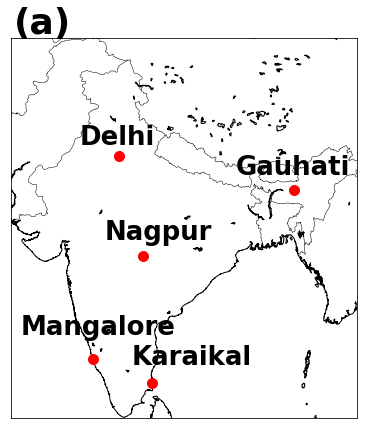

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))

# draw latitude/longitude lines every 0.2 degrees
# parallels = np.arange(24, 25, 0.2) 
# meridians = np.arange(54, 55, 0.2) 
# test_map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# test_map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

test_map.drawcoastlines()
# test_map.drawstates()
test_map.drawcountries()
# fills the land with grey color
# useful for you since your points are near the coast
# test_map.fillcontinents()

for row in df.itertuples():
    lat = getattr(row, "Latitude")
    lon = getattr(row, "Longitude")
    xpt, ypt = test_map(lon, lat)
    test_map.plot(xpt, ypt, marker = 'o',markersize=10, color='red', zorder=100)
    
    
plt.text(0.20, 0.72, "Delhi", horizontalalignment='left', fontsize=26,
         transform=plt.gca().transAxes, fontweight='bold')

plt.text(0.65, 0.64, "Gauhati", horizontalalignment='left', fontsize=26,
         transform=plt.gca().transAxes, fontweight='bold')

plt.text(0.27, 0.47, "Nagpur", horizontalalignment='left', fontsize=26,
         transform=plt.gca().transAxes, fontweight='bold')

plt.text(0.35, 0.14, "Karaikal", horizontalalignment='left', fontsize=26,
         transform=plt.gca().transAxes, fontweight='bold')

plt.text(0.03, 0.22, "Mangalore", horizontalalignment='left', fontsize=26,
         transform=plt.gca().transAxes, fontweight='bold')

plt.text(0.01, 1.01, "(a)", horizontalalignment='left', fontsize=36,
         transform=plt.gca().transAxes, fontweight='bold')

# plt.text(0.17, 1.09, 'Station Location', transform=plt.gca().transAxes,
#          fontsize=26, fontweight='bold')
plt.savefig("../plots/station_map_dirty.png", bbox_inches='tight', pad_inches = 0.5, dpi = 200)